In [223]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [224]:
dataO = pd.read_csv("/Users/peterdream/Downloads/Master_without_dummy.csv")

In [225]:
dataclean = pd.read_csv("/Users/peterdream/Downloads/Master_clean.csv")

In [226]:
dataclean['Ratio'] = dataclean['revenue_relative_2020']/dataclean['budget_relative_2020']
dataclean['If_success'] = dataclean['Ratio'].apply(lambda x: 0 if (x <=3) else 1)

In [227]:
missing_data = dataclean.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    
dataclean.dropna(axis=0, how='any', inplace=True)

False    3369
Name: Unnamed: 0, dtype: int64
False    3369
Name: title of tmdb_5000_credits, dtype: int64
False    3369
Name: budget, dtype: int64
False    3369
Name: original_language, dtype: int64
False    3369
Name: popularity, dtype: int64
False    3369
Name: release_date, dtype: int64
False    3369
Name: revenue, dtype: int64
False    3369
Name: vote_average, dtype: int64
False    3369
Name: vote_count, dtype: int64
False    3369
Name: key, dtype: int64
False    3369
Name: runtime, dtype: int64
False    3369
Name: cast_count, dtype: int64
False    3369
Name: Top3cast_avg_rev, dtype: int64
False    3369
Name: director_avg_revenue, dtype: int64
False    3369
Name: director_avg_vote, dtype: int64
False    3369
Name: Director_Number, dtype: int64
False    3369
Name: country_count, dtype: int64
False    3369
Name: company_count, dtype: int64
False    3369
Name: genre_count, dtype: int64
False    3369
Name: budget_relative_2020, dtype: int64
False    3369
Name: trend_average, dtype: int

In [231]:
a = [i for i in range(198)]
for i in range(10):
    a.remove(i)
for i in range(133,186):
    a.remove(i)
a.remove(20)

In [232]:
X = dataclean.iloc[:,a]
y = dataclean['If_success'].values

Since we have 3k+ data so we split the data into "5:2:3" test 30% to make sure they are in the same distribution

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=40
)

In [234]:
X_train.describe()

,runtime,cast_count,Top3cast_avg_rev,director_avg_revenue,director_avg_vote,Director_Number,country_count,company_count,genre_count,budget_relative_2020,...,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12
count,2357.000000,2357.000000,2.357000e+03,2.357000e+03,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2.357000e+03,...,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000
mean,110.725923,25.948664,8.776330e+07,8.782806e+07,6.329230,1.097157,2.401358,3.255409,2.686042,3.061042e+07,...,0.078914,0.064489,0.079338,0.092066,0.082308,0.084005,0.118371,0.086126,0.084005,0.103097
std,21.347804,21.078828,8.336282e+07,1.089586e+08,0.721982,0.629209,0.800126,2.180155,1.138848,3.575135e+07,...,0.269662,0.245674,0.270323,0.289181,0.274892,0.277454,0.323115,0.280610,0.277454,0.304150
min,41.000000,0.000000,1.298981e+00,1.298981e+00,0.000000,1.000000,2.000000,1.000000,1.000000,5.273567e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.000000,14.000000,3.443245e+07,1.880480e+07,5.900000,1.000000,2.000000,2.000000,2.000000,7.419659e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,107.000000,19.000000,7.030808e+07,5.472695e+07,6.366667,1.000000,2.000000,3.000000,3.000000,1.959336e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,122.000000,31.000000,1.153104e+08,1.102630e+08,6.783333,1.000000,3.000000,4.000000,3.000000,3.887541e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,338.000000,213.000000,8.495147e+08,1.125813e+09,10.000000,21.000000,13.000000,26.000000,7.000000,3.239769e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [235]:
y_test.shape

(1011,)

In [236]:
from sklearn import preprocessing, metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [237]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
def resultoutput(beta,classifiername,X_test, y_test):
    if hasattr(classifiername, "decision_function"): # decision fuction Take precedence over Predict proba for binary
        y_score = classifiername.decision_function(X_test)
    else:
        y_score = classifiername.predict_proba(X_test1)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    f_score = (1+ beta**2)*precision*recall/(beta**2*(precision+recall)) # define f beta score
    plt.plot(thresholds, f_score[:-1], "b--", label="Precision") 
    plt.xlabel("Threshold") 
    plt.show()
    f1list = list(f_score)
    index1 = f1list.index(max(f1list))
    print('Threshold:',list(thresholds)[index1]) # select best thresholds
    print('precision:',list(precision)[index1]) # calculate precision
    print('recall:',list(recall)[index1]) # calculate recall
    print('choosen Beta',beta)
    print('f1-score:',max(f1list))# calculate f beta score
    print('AUC under ROC',roc_auc_score(y_test, y_score))# calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=None) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.show()

In [238]:
from sklearn.linear_model import LogisticRegressionCV

classifier1 = Pipeline((
("scaler", StandardScaler()),
("Logistics", LogisticRegressionCV(cv = 10,random_state=0)), ))


classifier1.fit(X_train, y_train)
print('C = :',classifier1["Logistics"].C_)

C = : [2.7825594]


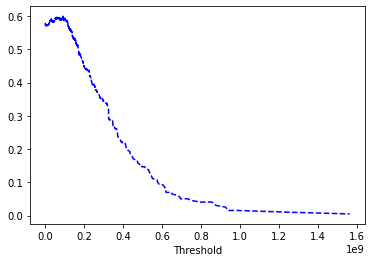

Threshold: 90909334.89828499
precision: 0.5202312138728323
recall: 0.7068062827225131
choosen Beta 1
f1-score: 0.5993340732519423
AUC under ROC 0.706269404606331


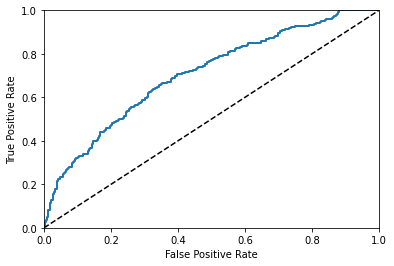

In [239]:
resultoutput(beta = 1,classifiername = classifier1["Logistics"] , X_test =X_test,y_test=y_test)

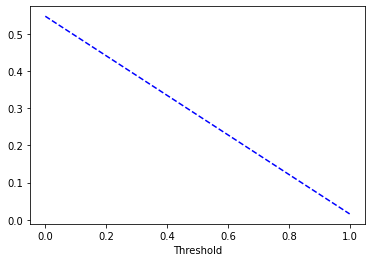

Threshold: 0.0
precision: 0.3778437190900099
recall: 1.0
choosen Beta 1
f1-score: 0.5484565685570711
AUC under ROC 0.5023368764514438


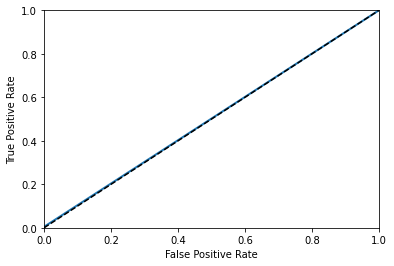

In [240]:
from sklearn.naive_bayes import GaussianNB
classifier2=Pipeline((
("scaler", StandardScaler()),
("GaussianNB", GaussianNB()), ))

classifier2.fit(X_train1, y_train)
resultoutput(beta = 1,classifiername = classifier2["GaussianNB"] , X_test =X_test,y_test=y_test)

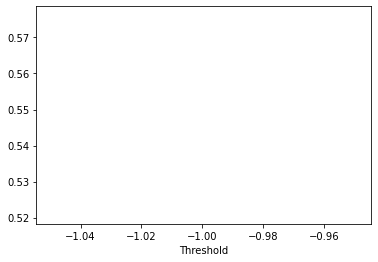

Threshold: -0.9995000000000099
precision: 0.3778437190900099
recall: 1.0
choosen Beta 1
f1-score: 0.5484565685570711
AUC under ROC 0.5


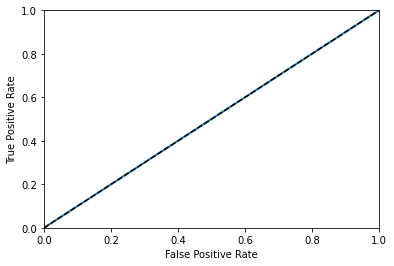

In [219]:
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline(( ("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) ))
rbf_kernel_svm_clf.fit(X_train, y_train)
resultoutput(beta = 1,classifiername = rbf_kernel_svm_clf["svm_clf"],X_test =X_test,y_test=y_test)

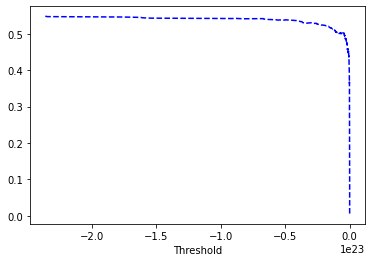

Threshold: -2.3591630165008702e+23
precision: 0.3778437190900099
recall: 1.0
choosen Beta 1
f1-score: 0.5484565685570711
AUC under ROC 0.43071775193733924


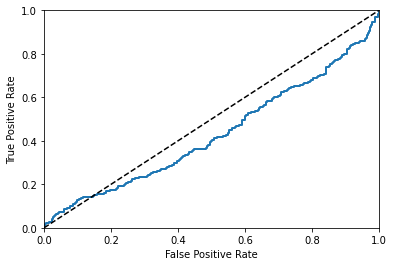

In [220]:
from sklearn.svm import SVC 
poly_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) ))
poly_kernel_svm_clf.fit(X_train, y_train)
resultoutput(beta = 1,classifiername = poly_kernel_svm_clf["svm_clf"],X_test =X_test,y_test=y_test)

In [221]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train) 

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [222]:
resultoutput(beta = 1,classifiername = bag_clf,X_test =X_test,y_test=y_test)

ValueError: Number of features of the model must match the input. Model n_features is 189 and input n_features is 135.

In [169]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

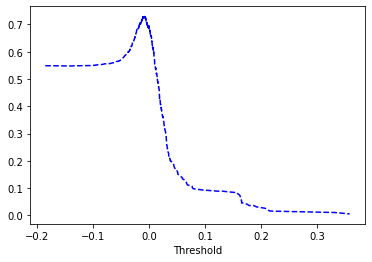

Threshold: -0.007430613114120148
precision: 0.6569037656903766
recall: 0.8219895287958116
choosen Beta 1
f1-score: 0.7302325581395349
AUC under ROC 0.850756207393103


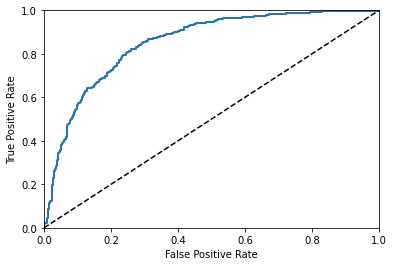

In [170]:
resultoutput(beta = 1,classifiername = ada_clf,X_test =X_test,y_test=y_test)

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10,random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))
]
sta_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(),cv = 5
)

sta_clf.fit(X_train, y_train).score(X_test, y_test)

0.7537091988130564

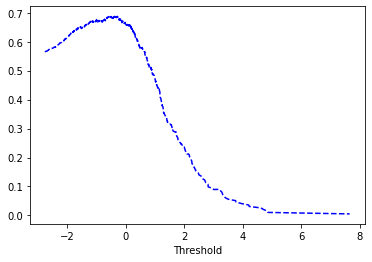

Threshold: -0.3407881943142974
precision: 0.6459770114942529
recall: 0.7356020942408377
choosen Beta 1
f1-score: 0.6878824969400245
AUC under ROC 0.8210864082437842


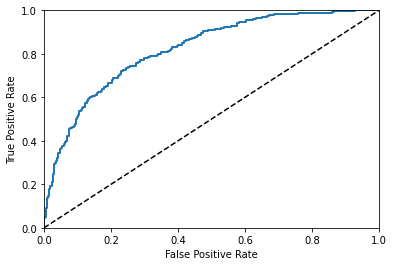

In [172]:
resultoutput(beta = 1,classifiername = sta_clf,X_test =X_test,y_test=y_test)

release date:
if holiday?
month?
weekday?

peer comparison:
how many movie are release at the same time period with this movie:(before one week and after one week)?
how many same genre is same with this movie last year?
How many total income for same genre movie last year?
total popular of one genre?


genre:
genre matrix, number of genres?
product companies matrix, number of product companies?

Keys? title?

actor:


some question:

"what's the scope of our dataset? focus on one country? USA",

"does it contain all the movies in a certain period"

"how long the period do we need?"






In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3) train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")